<h1>
    Project 2 - Data Visualization of Bird Strikes between 2000 – 2011
</h1>
<h2>
    Problem Statement
</h2>
<p>
    Transport and communication are in the crucial domain in the field of analytics. Environmental impacts and safety are, nowadays, two major concerns of the scientific community with respect to transport scenarios and to the ever-growing urban areas. These issues gain more importance due to the increasing amount of vehicles and
    people. Seeking new solutions is reaching a point where available technologies and artificial intelligence, especially MAS, are being recognized as ways to cope with and tackle these kinds of problems in a distributed and more appropriate way. A bird strike is strictly defined as a collision between a bird and an aircraft which is in flight or on a take-off or landing roll. The term is often expanded to cover other wildlife strikes - with bats or ground animals. Bird Strike is common and can be a significant threat to aircraft safety. For smaller aircraft, significant damage may be caused to the aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of thrust which can follow the ingestion of birds into engine air intakes. This has resulted in several fatal accidents.<br><br>
    Bird strikes may occur during any phase of flight, but are most likely during the take-off, initial climb, approach and landing phases due to the greater numbers of birds in flight at lower levels. To have a closer look the following document visually depicts the data collected on Bird Strikes by FAA between 2000-2011.
</p>
<h2>Content</h2>
<ul>
    <li>Data Cleaning</li>
    <li>Data Visualization</li>
    <ul>
        <li>Visuals Depicting the Number of Bird Strikes</li>
        <li>Yearly Analysis & Bird Strikes in the US</li>
        <li>Top 10 US Airlines in terms of having encountered bird strikes</li>
        <li>Airports with most incidents of bird strikes – Top 50</li>
        <li>Yearly Cost Incurred due to Bird Strikes:</li>
        <li>When do most bird strikes occur?</li>
        <li>Altitude of aeroplanes at the time of strike</li>
        <li>Phase of flight at the time of the strike.</li>
        <li>Average Altitude of the aeroplanes in different phases at the time of strike</li>
        <li>Effect of Bird Strikes & Impact on Flight</li>
        <li>Effect of Strike at Different Altitude</li>
        <li>Were Pilots Informed? & Prior Warning and Effect of Strike Relation</li>
     </ul>
</ul>        

<h3>Importing Required Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

<h3>Importing the Dataset</h3>

In [2]:
bird_data = pd.read_csv(r"C:\Users\heman\Downloads\Bird Striking\Bird Strikes data.csv")

<h3>Checking for rows and columns</h3>

In [3]:
rows, cols = bird_data.shape
print(f"Number of rows    : {rows}")
print(f"Number of columns : {cols}")

Number of rows    : 25558
Number of columns : 26


<h3>Viewing the data</h3>

In [4]:
pd.options.display.max_rows = rows
bird_data.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [5]:
columns = bird_data.columns

print("These are the columns :")
for col in columns:
    print(col)

These are the columns :
Record ID
Aircraft: Type
Airport: Name
Altitude bin
Aircraft: Make/Model
Wildlife: Number struck
Wildlife: Number Struck Actual
Effect: Impact to flight
FlightDate
Effect: Indicated Damage
Aircraft: Number of engines?
Aircraft: Airline/Operator
Origin State
When: Phase of flight
Conditions: Precipitation
Remains of wildlife collected?
Remains of wildlife sent to Smithsonian
Remarks
Wildlife: Size
Conditions: Sky
Wildlife: Species
Pilot warned of birds or wildlife?
Cost: Total $
Feet above ground
Number of people injured
Is Aircraft Large?


<h3>Extracting basic info of the data</h3>

In [6]:
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25429 non-null  object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

<h3>As we can see there are so much inconsistency between number of rows in many columns, this is due to the null values.</h3>

<h3>Checking no. of Null Values</h3>

In [7]:
bird_data.isnull().sum()

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

<h3>Check for unique values in columns with null values</h3>

In [8]:
len(bird_data['Remarks'].unique())

18187

In [9]:
bird_data['Origin State'].unique()

array(['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', nan,
       'Delaware', 'DC', 'Georgia', 'Florida', 'California', 'Illinois',
       'Connecticut', 'Missouri', 'Rhode Island', 'Hawaii', 'Arizona',
       'Tennessee', 'South Carolina', 'South Dakota', 'New Jersey',
       'Colorado', 'Minnesota', 'Alabama', 'Ohio', 'Wisconsin',
       'Michigan', 'Massachusetts', 'Alaska', 'North Carolina',
       'Kentucky', 'Indiana', 'Oregon', 'Pennsylvania', 'New Hampshire',
       'Arkansas', 'Nevada', 'Mississippi', 'Maryland', 'Maine', 'Quebec',
       'Idaho', 'British Columbia', 'Utah', 'Nebraska', 'Iowa',
       'New Mexico', 'West Virginia', 'Oklahoma', 'North Dakota',
       'Vermont', 'Wyoming', 'Kansas', 'Prince Edward Island', 'Montana',
       'Puerto Rico', 'Ontario', 'Virgin Islands',
       'Newfoundland and Labrador', 'Alberta', 'Saskatchewan'],
      dtype=object)

In [10]:
bird_data['Aircraft: Number of engines?'].unique()

array(['2', '3', '4', nan, '1', 'C'], dtype=object)

<h3>Dropping all null values</h3>

In [11]:
bird_data_new = bird_data.dropna()

In [12]:
bird_data_new.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

<h3>So now all the rows with null values are dropped.</h3>

In [13]:
bird_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20142 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                20142 non-null  int64 
 1   Aircraft: Type                           20142 non-null  object
 2   Airport: Name                            20142 non-null  object
 3   Altitude bin                             20142 non-null  object
 4   Aircraft: Make/Model                     20142 non-null  object
 5   Wildlife: Number struck                  20142 non-null  object
 6   Wildlife: Number Struck Actual           20142 non-null  int64 
 7   Effect: Impact to flight                 20142 non-null  object
 8   FlightDate                               20142 non-null  object
 9   Effect: Indicated Damage                 20142 non-null  object
 10  Aircraft: Number of engines?             20142 non-null  o

<h3>Chnaging data types of column</h3>

In [14]:
columns = ['FlightDate', 'Aircraft: Number of engines?', 'Cost: Total $', 'Feet above ground']
bird_data['FlightDate'] = pd.to_datetime(bird_data['FlightDate'])

In [15]:
bird_data = bird_data[bird_data['Aircraft: Number of engines?'] != 'C']
bird_data['Aircraft: Number of engines?'] = bird_data['Aircraft: Number of engines?'].astype('float')
bird_data['Cost: Total $'] = bird_data['Cost: Total $'].str.replace(',','').astype('float')
bird_data['Feet above ground'] = bird_data['Feet above ground'].str.replace(',' ,'').astype('float')

In [16]:
for col in columns:
    print(f"{col} --> {bird_data[col].dtype}")

FlightDate --> datetime64[ns]
Aircraft: Number of engines? --> float64
Cost: Total $ --> float64
Feet above ground --> float64


<h3>Let's get a describtion</h3>

In [17]:
bird_data_new.describe()

,Record ID,Wildlife: Number Struck Actual,Number of people injured
count,20142.000000,20142.000000,20142.000000
mean,255993.710605,2.861980,0.001043
std,35594.083484,13.558744,0.053188
min,200011.000000,1.000000,0.000000
25%,227283.250000,1.000000,0.000000
50%,250426.500000,1.000000,0.000000
75%,270159.750000,1.000000,0.000000
max,321909.000000,942.000000,6.000000


<h3>Extracting 'Year' and 'Month' from 'FlightDate'</h3>

In [18]:
bird_data['Year'] = bird_data['FlightDate'].dt.year
bird_data['Month'] = bird_data['FlightDate'].dt.month

<h3>Let's start</h3>

<h3>Q1. Visuals Depicting the Number of Bird Strikes.</h3>

<h4>Monthly Bird Strike</h4>

In [19]:
import calendar

monthly_bird_strike = bird_data.groupby(['Month']).agg({
    'Wildlife: Number Struck Actual': 'sum'
}).reset_index()

monthly_bird_strike['Month'] = monthly_bird_strike['Month'].apply(lambda x: calendar.month_name[int(x)])

print(monthly_bird_strike.to_string(index = False))

    Month  Wildlife: Number Struck Actual
  January                            3106
 February                            2602
    March                            3539
    April                            3802
      May                            4077
     June                            5209
     July                            9344
   August                           11013
September                            9201
  October                            7277
 November                            6305
 December                            3173


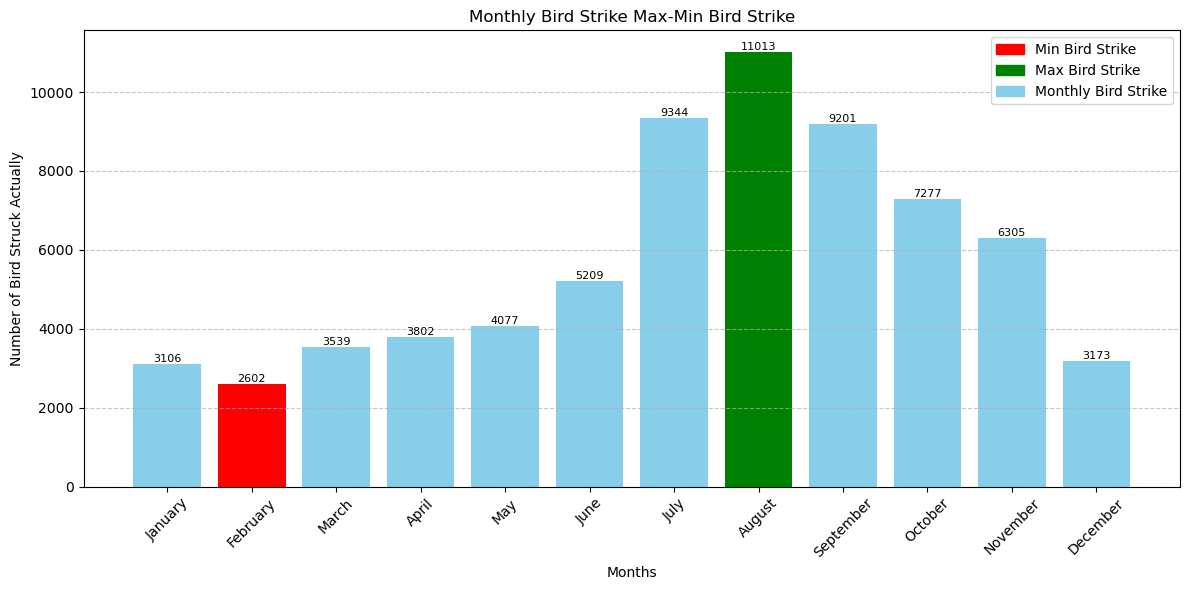

In [20]:
plt.figure(figsize=(12, 6))

bars = plt.bar(monthly_bird_strike['Month'], monthly_bird_strike['Wildlife: Number Struck Actual'], color='skyblue', label='Monthly Bird Strike')

for bar, number_actual_struck in zip(bars, monthly_bird_strike['Wildlife: Number Struck Actual']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(number_actual_struck), ha='center', va='bottom', fontsize=8)

legend_patches = []
for i, (month, number_actual_struck) in enumerate(zip(monthly_bird_strike['Month'], monthly_bird_strike['Wildlife: Number Struck Actual'])):
    if number_actual_struck == max(monthly_bird_strike['Wildlife: Number Struck Actual']):
        color = 'green'
        label='Max Bird Strike'
        plt.bar(month, number_actual_struck, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label='Max Bird Strike'))

    elif number_actual_struck == min(monthly_bird_strike['Wildlife: Number Struck Actual']):
        color = 'red'
        label='Min Bird Strike'
        plt.bar(month, number_actual_struck, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label='Min Bird Strike'))
    else:
        continue

legend_patches.append(mpatches.Patch(color='skyblue', label='Monthly Bird Strike'))

plt.legend(handles=legend_patches)
plt.xlabel('Months')
plt.ylabel('Number of Bird Struck Actually')
plt.title('Monthly Bird Strike Max-Min Bird Strike')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>Q2. Yearly Analysis & Bird Strikes in the US. </h3>

<h4>
    <ul>
        <li>Yearly Analysis</li>
    </ul>
</h4>

In [21]:
yearly_bird_strike = bird_data.groupby(['Year']).agg({
    'Wildlife: Number Struck Actual': 'sum'
}).reset_index()

yearly_bird_strike['Year'] = yearly_bird_strike['Year'].astype('int')

print(yearly_bird_strike.to_string(index = False))

 Year  Wildlife: Number Struck Actual
 2000                            4554
 2001                            4720
 2002                            5505
 2003                            6193
 2004                            4349
 2005                            5138
 2006                            5839
 2007                            5069
 2008                            5350
 2009                            7169
 2010                            7657
 2011                            7105


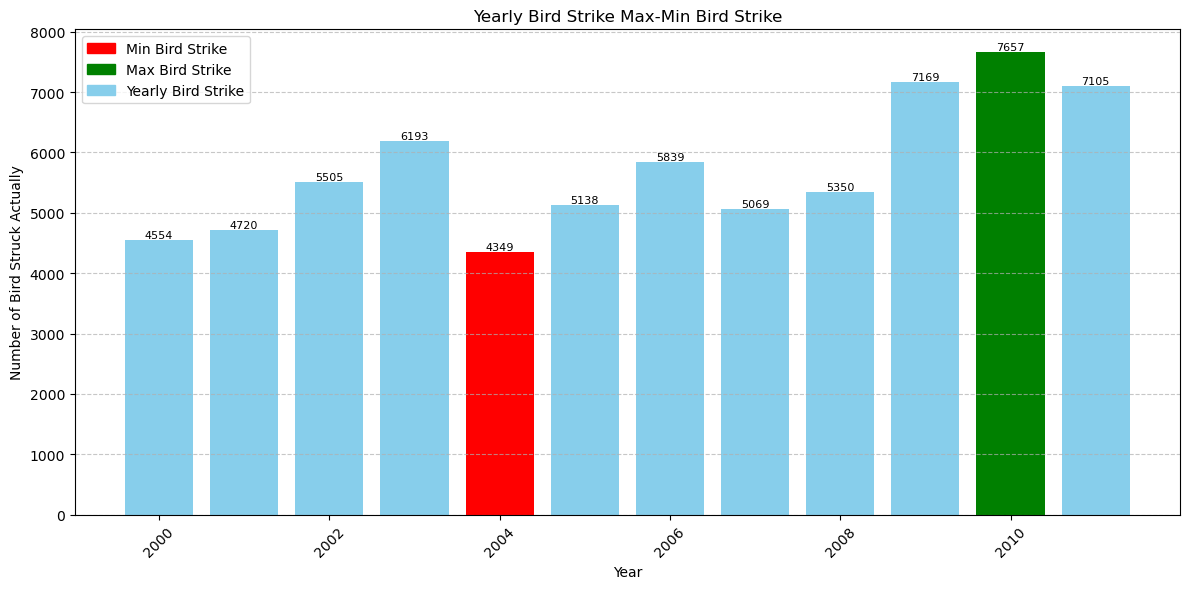

In [22]:
plt.figure(figsize=(12, 6))

bars = plt.bar(yearly_bird_strike['Year'], yearly_bird_strike['Wildlife: Number Struck Actual'], color='skyblue', label='Yearly Bird Strike')

for bar, number_actual_struck in zip(bars, yearly_bird_strike['Wildlife: Number Struck Actual']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(number_actual_struck), ha='center', va='bottom', fontsize=8)

legend_patches = []
for year, number_actual_struck in zip(yearly_bird_strike['Year'], yearly_bird_strike['Wildlife: Number Struck Actual']):
    if number_actual_struck == max(yearly_bird_strike['Wildlife: Number Struck Actual']):
        color = 'green'
        label='Max Bird Strike'
        plt.bar(year, number_actual_struck, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label='Max Bird Strike'))

    elif number_actual_struck == min(yearly_bird_strike['Wildlife: Number Struck Actual']):
        color = 'red'
        label='Min Bird Strike'
        plt.bar(year, number_actual_struck, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label='Min Bird Strike'))
    else:
        continue

legend_patches.append(mpatches.Patch(color='skyblue', label='Yearly Bird Strike'))

plt.legend(handles=legend_patches)
plt.xlabel('Year')
plt.ylabel('Number of Bird Struck Actually')
plt.title('Yearly Bird Strike Max-Min Bird Strike')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h4>
    <ul>
        <li>Bird Strike in US</li>
    </ul>
</h4>

In [23]:
state_wise_bird_strike = bird_data.groupby(['Origin State']).agg({
    'Wildlife: Number Struck Actual': 'sum'
}).reset_index()

print(state_wise_bird_strike.to_string(index = False))

             Origin State  Wildlife: Number Struck Actual
                  Alabama                             770
                   Alaska                             547
                  Alberta                               3
                  Arizona                             508
                 Arkansas                             452
         British Columbia                              63
               California                            7126
                 Colorado                            1284
              Connecticut                             839
                       DC                            1385
                 Delaware                             348
                  Florida                            4087
                  Georgia                            1660
                   Hawaii                            2086
                    Idaho                             181
                 Illinois                            2550
              

In [24]:
us_states = [
    'New York', 'Rhode Island', 'Tennessee', 'South Carolina', 'Michigan', 'North Carolina', 'Indiana',
    'Massachusetts', 'Kentucky', 'Maryland', 'Alabama', 'Pennsylvania', 'New Jersey', 'California', 'Georgia',
    'Florida', 'Virginia', 'Vermont', 'Missouri', 'Connecticut', 'Illinois', 'New Hampshire', 'Louisiana',
    'New Mexico', 'Arizona', 'Minnesota', 'Utah', 'Texas', 'Colorado', 'Mississippi', 'Nebraska',
    'Ohio', 'Wisconsin', 'West Virginia', 'Maine', 'Washington', 'Nevada', 'Hawaii', 'Oregon', 'Idaho', 'Alaska',
    'Oklahoma', 'Montana'
]

us_state_wise_bird_strike = state_wise_bird_strike[state_wise_bird_strike['Origin State'].isin(us_states)]

print(us_state_wise_bird_strike.to_string(index=False))

  Origin State  Wildlife: Number Struck Actual
       Alabama                             770
        Alaska                             547
       Arizona                             508
    California                            7126
      Colorado                            1284
   Connecticut                             839
       Florida                            4087
       Georgia                            1660
        Hawaii                            2086
         Idaho                             181
      Illinois                            2550
       Indiana                             975
      Kentucky                            2053
     Louisiana                            1057
         Maine                              94
      Maryland                            1124
 Massachusetts                            1193
      Michigan                            1358
     Minnesota                             776
   Mississippi                             350
      Missour

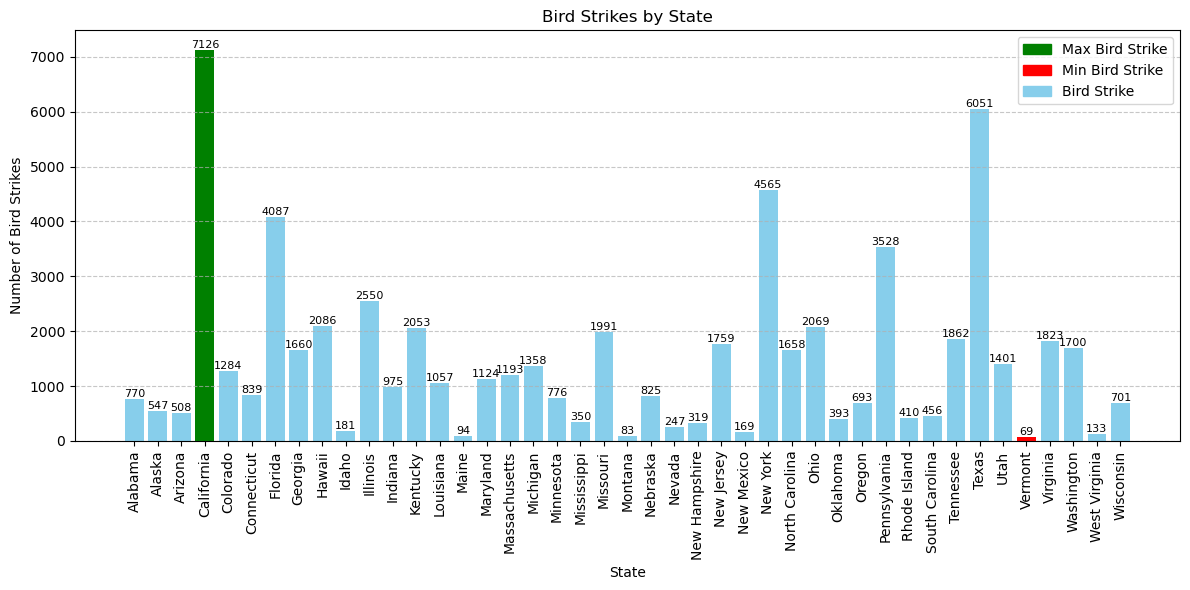

In [25]:
plt.figure(figsize=(12, 6))

bars = plt.bar(us_state_wise_bird_strike['Origin State'], us_state_wise_bird_strike['Wildlife: Number Struck Actual'], color='skyblue', label='Bird Strike')

for bar, number_actual_struck in zip(bars, us_state_wise_bird_strike['Wildlife: Number Struck Actual']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(number_actual_struck), ha='center', va='bottom', fontsize=8)

legend_patches = []
for state, number_actual_struck in zip(us_state_wise_bird_strike['Origin State'], us_state_wise_bird_strike['Wildlife: Number Struck Actual']):
    if number_actual_struck == max(us_state_wise_bird_strike['Wildlife: Number Struck Actual']):
        color = 'green'
        label='Max Bird Strike'
        plt.bar(state, number_actual_struck, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='green', label='Max Bird Strike'))

    elif number_actual_struck == min(us_state_wise_bird_strike['Wildlife: Number Struck Actual']):
        color = 'red'
        label='Min Bird Strike'
        plt.bar(state, number_actual_struck, color=color, label=label)
        legend_patches.append(mpatches.Patch(color='red', label='Min Bird Strike'))
    else:
        continue

legend_patches.append(mpatches.Patch(color='skyblue', label='Bird Strike'))

plt.legend(handles=legend_patches)
plt.xlabel('State')
plt.ylabel('Number of Bird Strikes')
plt.title('Bird Strikes by State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>Q3. Top 10 US Airlines in terms of having encountered bird strikes.</h3>


In [26]:
airlines_wise_bird_strike = bird_data.groupby(['Aircraft: Airline/Operator']).agg({
    'Wildlife: Number Struck Actual': 'sum'
}).reset_index()

airlines_wise_bird_strike_sorted = airlines_wise_bird_strike.sort_values(by='Wildlife: Number Struck Actual', ascending=False)

top_10_airlines = airlines_wise_bird_strike_sorted.head(10)

print(top_10_airlines.to_string(index = False))

Aircraft: Airline/Operator  Wildlife: Number Struck Actual
                  BUSINESS                            9330
        SOUTHWEST AIRLINES                            9208
         AMERICAN AIRLINES                            6107
           DELTA AIR LINES                            3911
               US AIRWAYS*                            3377
   AMERICAN EAGLE AIRLINES                            2763
           COMAIR AIRLINES                            1986
           UNITED AIRLINES                            1930
          SKYWEST AIRLINES                            1920
           JETBLUE AIRWAYS                            1562


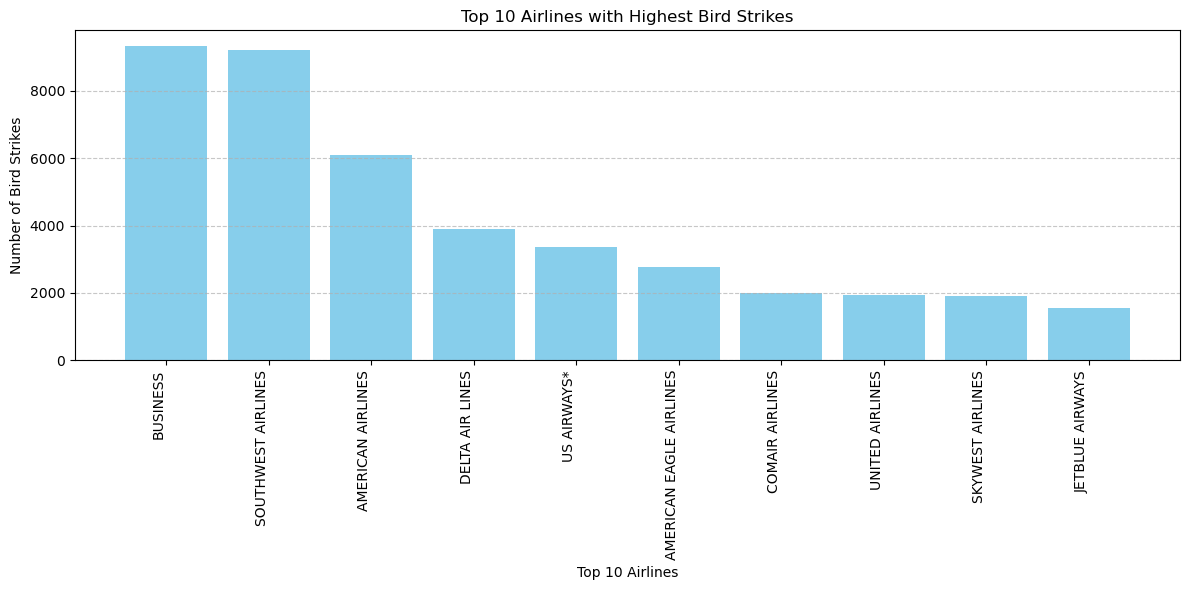

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_airlines['Aircraft: Airline/Operator'], top_10_airlines['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Top 10 Airlines')
plt.ylabel('Number of Bird Strikes')
plt.title('Top 10 Airlines with Highest Bird Strikes')

plt.xticks(rotation=90, ha='right')
plt.gca().set_xticks(top_10_airlines['Aircraft: Airline/Operator'])
plt.gca().set_xticklabels(top_10_airlines['Aircraft: Airline/Operator'])

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<h3>Q.4 Airports with most incidents of bird strikes – Top 50.</h3>

In [28]:
airport_wise_bird_strike = bird_data.groupby(['Airport: Name']).agg({
    'Wildlife: Number Struck Actual': 'sum'
}).reset_index()

airport_wise_bird_strike_sorted = airport_wise_bird_strike.sort_values(by='Wildlife: Number Struck Actual', ascending=False)

top_50_airport = airport_wise_bird_strike_sorted.head(50)

print(top_50_airport.to_string(index = False))

                         Airport: Name  Wildlife: Number Struck Actual
           DALLAS/FORT WORTH INTL ARPT                            2933
                       SACRAMENTO INTL                            1856
                          LAGUARDIA NY                            1579
                     PHILADELPHIA INTL                            1396
                   SALT LAKE CITY INTL                            1376
               SAN FRANCISCO INTL ARPT                            1210
                   JOHN F KENNEDY INTL                            1207
                   SEATTLE-TACOMA INTL                            1181
                          NORFOLK INTL                            1119
                   BALTIMORE WASH INTL                            1027
                        NASHVILLE INTL                            1003
                            LOGAN INTL                             962
                      KANSAS CITY INTL                             921
      

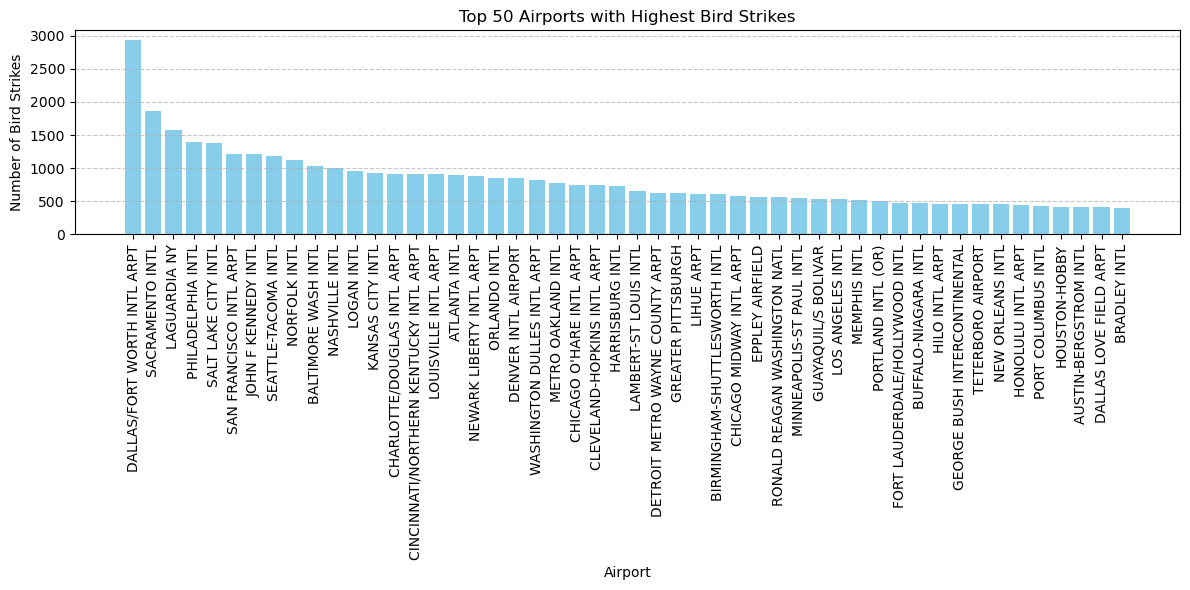

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(top_50_airport['Airport: Name'], top_50_airport['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.title('Top 50 Airports with Highest Bird Strikes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

<h3>Q5. Yearly Cost Incurred due to Bird Strikes.</h3>

In [30]:
yearly_cost_bird_strike = bird_data.groupby(['Year']).agg({
    'Cost: Total $': 'sum'
}).reset_index()

yearly_cost_bird_strike['Year'] = yearly_cost_bird_strike['Year'].astype('int')

print(yearly_cost_bird_strike.to_string(index = False))

 Year  Cost: Total $
 2000      5625496.0
 2001     23252168.0
 2002      9046405.0
 2003     13176787.0
 2004      8116866.0
 2005      7026670.0
 2006     18309903.0
 2007     10822426.0
 2008     11966121.0
 2009      9564327.0
 2010     11459879.0
 2011     13180130.0


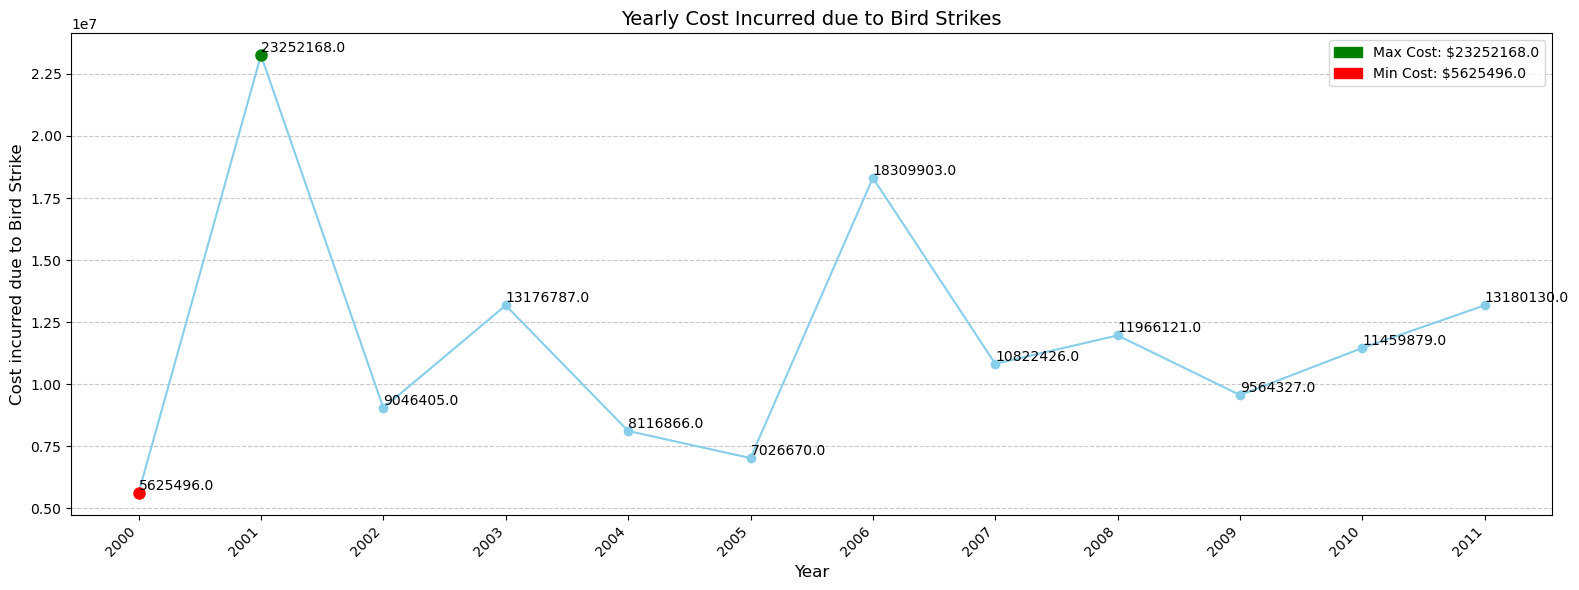

In [31]:
plt.figure(figsize=(16, 6))

plt.plot(yearly_cost_bird_strike['Year'], yearly_cost_bird_strike['Cost: Total $'], marker='o', color='skyblue', linestyle='-')

# Find max and min cost
max_value = max(yearly_cost_bird_strike['Cost: Total $'])
min_value = min(yearly_cost_bird_strike['Cost: Total $'])

max_index = yearly_cost_bird_strike[yearly_cost_bird_strike['Cost: Total $'] == max_value].index
min_index = yearly_cost_bird_strike[yearly_cost_bird_strike['Cost: Total $'] == min_value].index

plt.xlabel('Year', fontsize=12)
plt.ylabel('Cost incurred due to Bird Strike', fontsize=12)
plt.title('Yearly Cost Incurred due to Bird Strikes', fontsize=14)

legend_patches = [
    mpatches.Patch(color='green', label='Max Cost: $' + str(max_value)),
    mpatches.Patch(color='red', label='Min Cost: $' + str(min_value))
]
plt.legend(handles=legend_patches)

for i, cost in enumerate(yearly_cost_bird_strike['Cost: Total $']):
    plt.text(yearly_cost_bird_strike['Year'][i], cost, str(cost), ha='left', va='bottom')

plt.plot(yearly_cost_bird_strike.loc[max_index, 'Year'], yearly_cost_bird_strike.loc[max_index, 'Cost: Total $'], marker='o', markersize=8, color='green')
plt.plot(yearly_cost_bird_strike.loc[min_index, 'Year'], yearly_cost_bird_strike.loc[min_index, 'Cost: Total $'], marker='o', markersize=8, color='red')

plt.xticks(yearly_cost_bird_strike['Year'], rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<h3>Q6. When do most bird strikes occur?</h3>

In [32]:
phase_of_flight_counts = bird_data.groupby(['When: Phase of flight']).size().reset_index(name = 'Number of Bird Strikes')

phase_of_flight_counts_sorted = phase_of_flight_counts.sort_values(by = 'Number of Bird Strikes', ascending = False)

print(phase_of_flight_counts_sorted.to_string(index = False))

When: Phase of flight  Number of Bird Strikes
             Approach                   10382
         Landing Roll                    5047
         Take-off run                    4711
                Climb                    4429
              Descent                     775
                 Taxi                      74
               Parked                      10


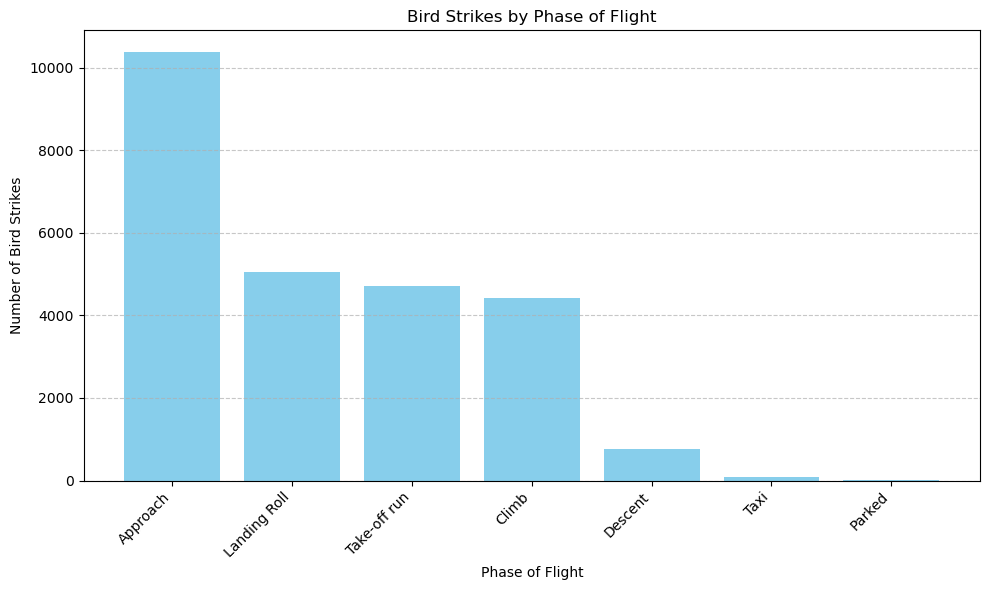

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(phase_of_flight_counts_sorted['When: Phase of flight'], phase_of_flight_counts_sorted['Number of Bird Strikes'], color='skyblue')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.title('Bird Strikes by Phase of Flight')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Q.7 Altitude of aeroplanes at the time of strike.</h3>

In [34]:
bird_strikes_phase_altitude = bird_data.groupby(['Altitude bin']).size().reset_index(name='Count')

print(bird_strikes_phase_altitude.to_string(index = False))

Altitude bin  Count
   < 1000 ft  20556
   > 1000 ft   4872


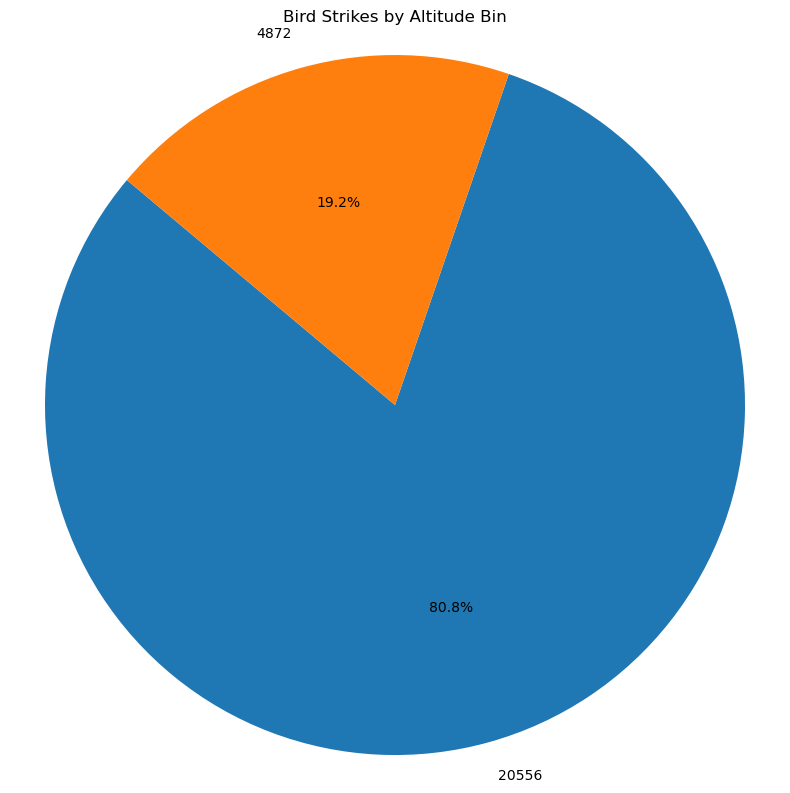

In [35]:
bird_strikes_phase_altitude = bird_data.groupby('Altitude bin').size().reset_index(name='Count')

plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(bird_strikes_phase_altitude['Count'], labels=bird_strikes_phase_altitude['Altitude bin'], autopct='%1.1f%%', startangle=140)


for text, count in zip(texts, bird_strikes_phase_altitude['Count']):
    text.set_text(f"{count}")

plt.title('Bird Strikes by Altitude Bin')

plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

<h3>Q.8 Phase of flight at the time of the strike.</h3>

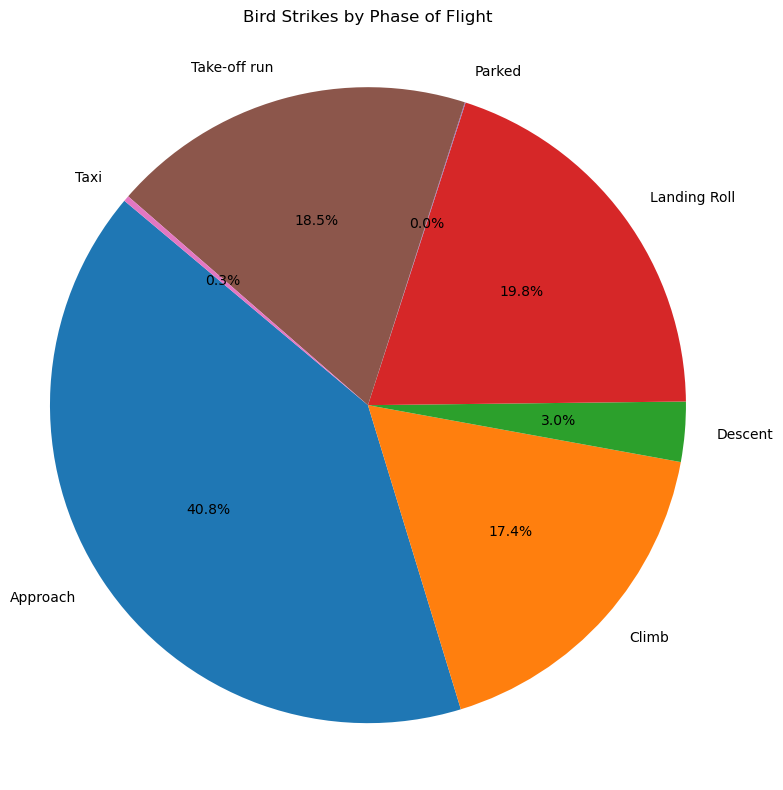

In [36]:
bird_strikes_phase = bird_data.groupby('When: Phase of flight').size().reset_index(name='Count')

total_strikes = bird_strikes_phase['Count'].sum()

plt.figure(figsize=(8, 8))

plt.pie(bird_strikes_phase['Count'], labels=bird_strikes_phase['When: Phase of flight'], autopct='%1.1f%%', startangle=140)

plt.title('Bird Strikes by Phase of Flight')

plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()

<h3>Q9. Average Altitude of the aeroplanes in different phases at the time of strike.</h3>

In [37]:
phase_of_flight_by_avg_altitude = bird_data.groupby(['When: Phase of flight']).agg({
    'Feet above ground': 'mean'
}).reset_index()

phase_of_flight_by_avg_altitude = phase_of_flight_by_avg_altitude.rename(columns={'Feet above ground': 'avg feet above ground'})

print(phase_of_flight_by_avg_altitude.to_string(index=False))

When: Phase of flight  avg feet above ground
             Approach            1001.733385
                Climb            1199.654324
              Descent            5936.455484
         Landing Roll               0.000000
               Parked               0.000000
         Take-off run               0.101040
                 Taxi               0.000000


In [38]:
filtered_phase_of_flight_by_avg_altitude = phase_of_flight_by_avg_altitude[phase_of_flight_by_avg_altitude['avg feet above ground'] > 0.5]

sorted_phase_of_flight_by_avg_altitude = filtered_phase_of_flight_by_avg_altitude.sort_values(by = 'avg feet above ground',
                                                                                     ascending = False)

print(sorted_phase_of_flight_by_avg_altitude.to_string(index = False))

When: Phase of flight  avg feet above ground
              Descent            5936.455484
                Climb            1199.654324
             Approach            1001.733385


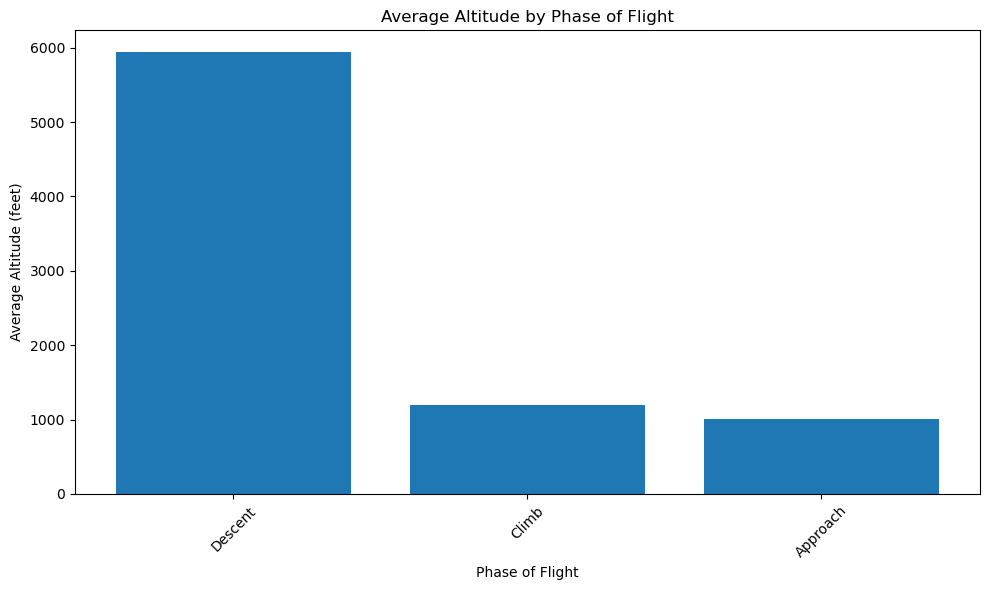

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_phase_of_flight_by_avg_altitude['When: Phase of flight'], sorted_phase_of_flight_by_avg_altitude['avg feet above ground'])
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (feet)')
plt.title('Average Altitude by Phase of Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Q10. Effect of Bird Strikes & Impact on Flight.</h3>

In [40]:
number_of_bird_strike_by_impact_to_flight = bird_data.groupby('Effect: Impact to flight').agg({
    'Wildlife: Number Struck Actual':'sum'
}).reset_index()
print(number_of_bird_strike_by_impact_to_flight.to_string(index=False))

Effect: Impact to flight  Wildlife: Number Struck Actual
        Aborted Take-off                            2159
        Engine Shut Down                            1421
                    None                           56245
                   Other                            2132
   Precautionary Landing                            6691


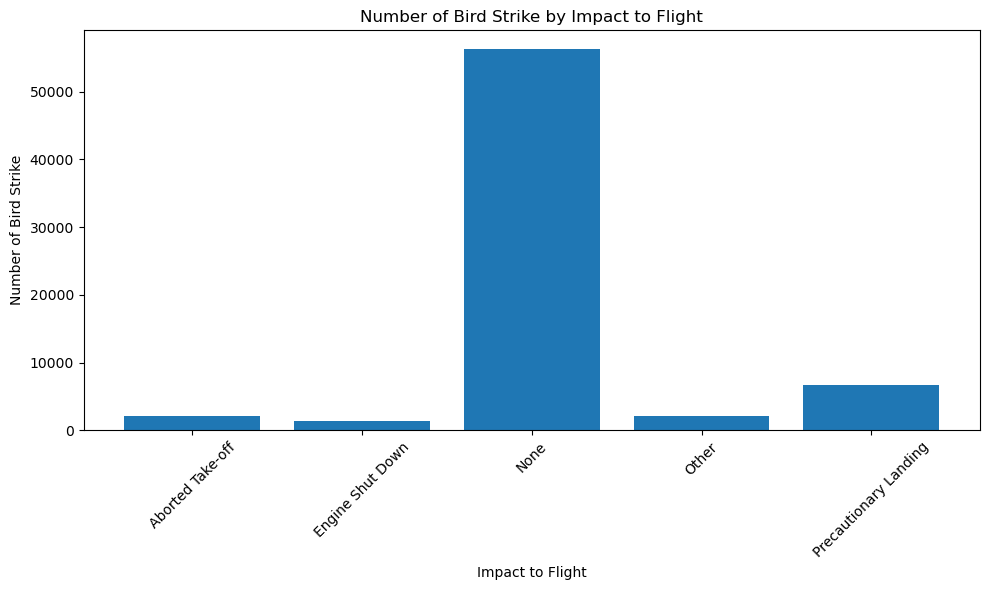

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(number_of_bird_strike_by_impact_to_flight['Effect: Impact to flight'], number_of_bird_strike_by_impact_to_flight['Wildlife: Number Struck Actual'])
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strike')
plt.title('Number of Bird Strike by Impact to Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Q11. Effect of Strike at Different Altitude.</h3>

In [42]:
number_of_bird_strike_by_effect_and_impact = bird_data.groupby(['Altitude bin','Effect: Impact to flight']).agg({
    'Wildlife: Number Struck Actual':'sum'
}).reset_index()
print(number_of_bird_strike_by_effect_and_impact.to_string(index=False))

Altitude bin Effect: Impact to flight  Wildlife: Number Struck Actual
   < 1000 ft         Aborted Take-off                            2159
   < 1000 ft         Engine Shut Down                             526
   < 1000 ft                     None                           49283
   < 1000 ft                    Other                            1955
   < 1000 ft    Precautionary Landing                            5879
   > 1000 ft         Engine Shut Down                             895
   > 1000 ft                     None                            6962
   > 1000 ft                    Other                             177
   > 1000 ft    Precautionary Landing                             812


In [43]:
lt_1000 = number_of_bird_strike_by_effect_and_impact[number_of_bird_strike_by_effect_and_impact['Altitude bin'] == '< 1000 ft']

gt_1000 = number_of_bird_strike_by_effect_and_impact[number_of_bird_strike_by_effect_and_impact['Altitude bin'] == '> 1000 ft']
print(lt_1000.to_string(index=False))
print("---------------------------------------------------------------------")
print(gt_1000.to_string(index=False))

Altitude bin Effect: Impact to flight  Wildlife: Number Struck Actual
   < 1000 ft         Aborted Take-off                            2159
   < 1000 ft         Engine Shut Down                             526
   < 1000 ft                     None                           49283
   < 1000 ft                    Other                            1955
   < 1000 ft    Precautionary Landing                            5879
---------------------------------------------------------------------
Altitude bin Effect: Impact to flight  Wildlife: Number Struck Actual
   > 1000 ft         Engine Shut Down                             895
   > 1000 ft                     None                            6962
   > 1000 ft                    Other                             177
   > 1000 ft    Precautionary Landing                             812


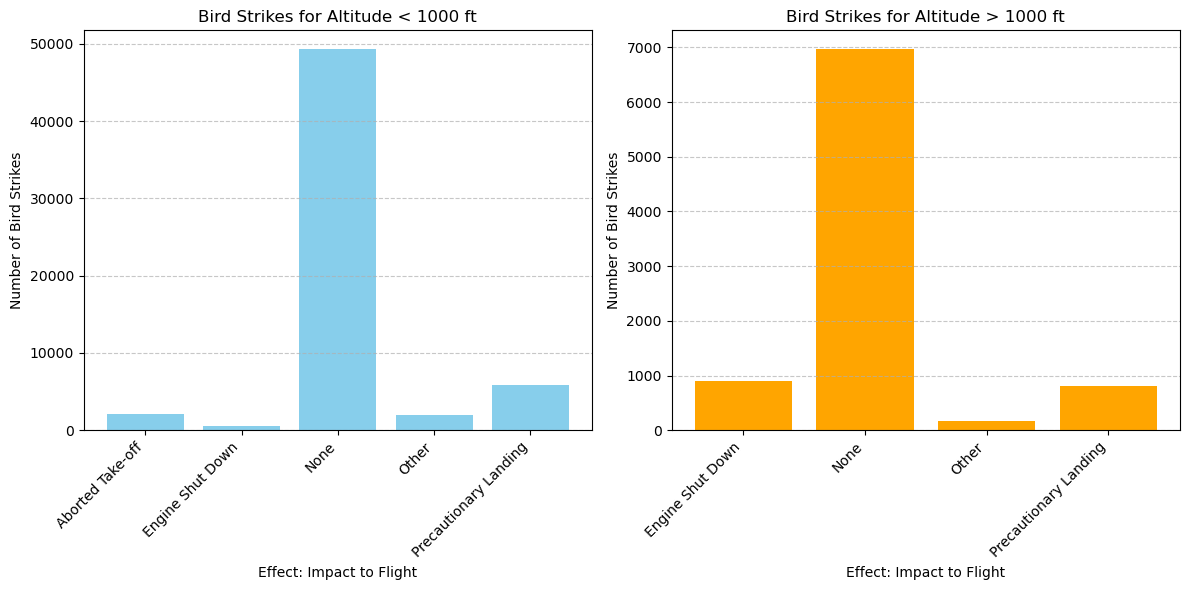

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(lt_1000['Effect: Impact to flight'], lt_1000['Wildlife: Number Struck Actual'], color='skyblue')
plt.xlabel('Effect: Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.title('Bird Strikes for Altitude < 1000 ft')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(gt_1000['Effect: Impact to flight'], gt_1000['Wildlife: Number Struck Actual'], color='orange')
plt.xlabel('Effect: Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.title('Bird Strikes for Altitude > 1000 ft')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<h3>Q12. Were Pilots Informed? & Prior Warning and Effect of Strike Relation.</h3>

<h4>Q12.1. Were Pilots Informed?</h4>

In [45]:
bird_strikes_warning = bird_data.groupby('Pilot warned of birds or wildlife?').size().reset_index(name='Count')

print(bird_strikes_warning.to_string(index=False))

Pilot warned of birds or wildlife?  Count
                                 N  14566
                                 Y  10862


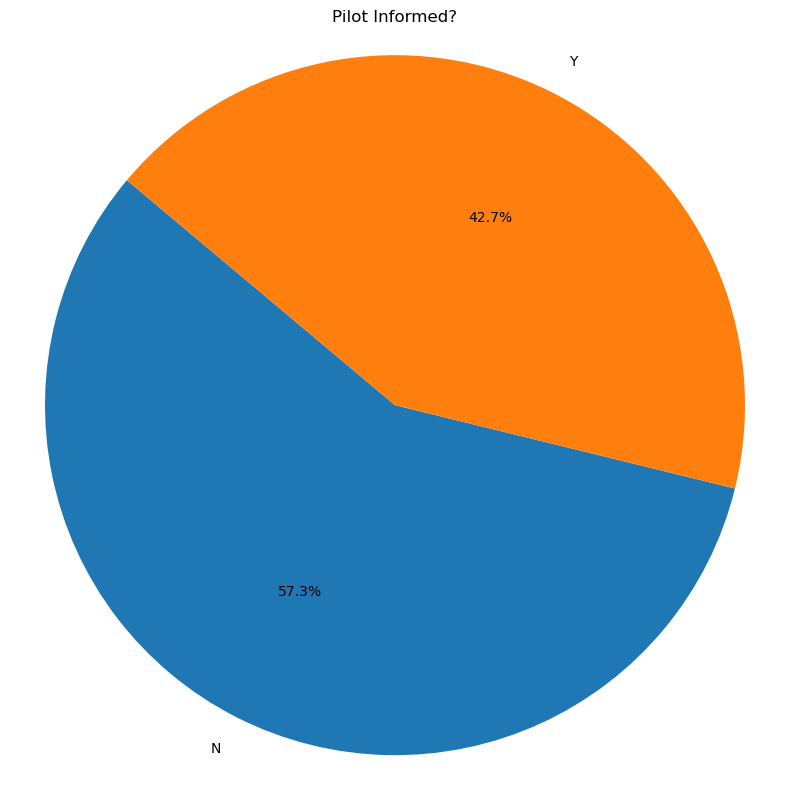

In [46]:
bird_strikes_warning = bird_data.groupby('Pilot warned of birds or wildlife?').size().reset_index(name='Count')

plt.figure(figsize=(8, 8))
plt.pie(bird_strikes_warning['Count'], labels=bird_strikes_warning['Pilot warned of birds or wildlife?'], autopct='%1.1f%%', startangle=140)

plt.title('Pilot Informed?')

plt.axis('equal')
plt.tight_layout()
plt.show()


<h4>Q12.2. Prior Warning and Effect of Strike Relation.</h4>

In [47]:
prior_warning_effect = bird_data.groupby(['Pilot warned of birds or wildlife?', 'Effect: Impact to flight']).size().reset_index(
    name='Count of Warned or not')

print(prior_warning_effect.to_string(index=False))

Pilot warned of birds or wildlife? Effect: Impact to flight  Count of Warned or not
                                 N         Aborted Take-off                     250
                                 N         Engine Shut Down                      52
                                 N                     None                   13397
                                 N                    Other                     248
                                 N    Precautionary Landing                     619
                                 Y         Aborted Take-off                     229
                                 Y         Engine Shut Down                      36
                                 Y                     None                    9953
                                 Y                    Other                     142
                                 Y    Precautionary Landing                     502


In [48]:
n_prior_warning_effect = prior_warning_effect[prior_warning_effect['Pilot warned of birds or wildlife?'] == 'N']

y_prior_warning_effect = prior_warning_effect[prior_warning_effect['Pilot warned of birds or wildlife?'] == 'Y']

print(n_prior_warning_effect.to_string(index=False))
print("-----------------------------------------------------------------------------------")
print(y_prior_warning_effect.to_string(index=False))

Pilot warned of birds or wildlife? Effect: Impact to flight  Count of Warned or not
                                 N         Aborted Take-off                     250
                                 N         Engine Shut Down                      52
                                 N                     None                   13397
                                 N                    Other                     248
                                 N    Precautionary Landing                     619
-----------------------------------------------------------------------------------
Pilot warned of birds or wildlife? Effect: Impact to flight  Count of Warned or not
                                 Y         Aborted Take-off                     229
                                 Y         Engine Shut Down                      36
                                 Y                     None                    9953
                                 Y                    Other                 

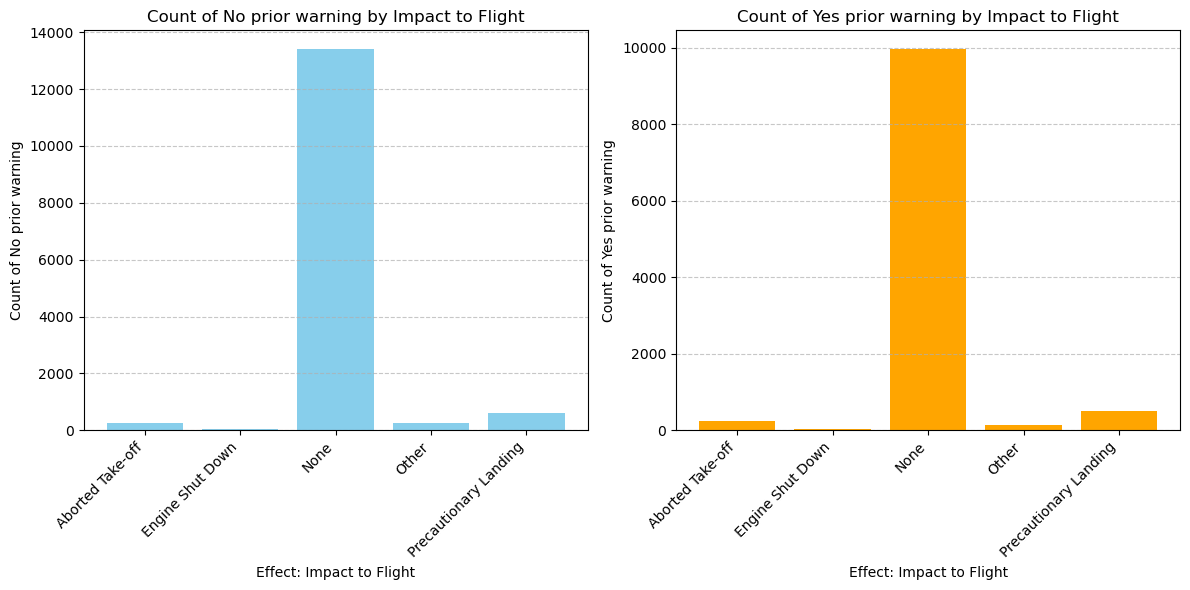

In [49]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(n_prior_warning_effect['Effect: Impact to flight'], n_prior_warning_effect['Count of Warned or not'], color='skyblue')
plt.xlabel('Effect: Impact to Flight')
plt.ylabel('Count of No prior warning')
plt.title('Count of No prior warning by Impact to Flight')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(y_prior_warning_effect['Effect: Impact to flight'], y_prior_warning_effect['Count of Warned or not'], color='orange')
plt.xlabel('Effect: Impact to Flight')
plt.ylabel('Count of Yes prior warning')
plt.title('Count of Yes prior warning by Impact to Flight')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<h3>Saving the Transformed Data</h3>

In [50]:
bird_data.to_csv("C:/Users/heman/Downloads/project dataset/Bird Strike Data.csv", index = False)